# Review Classification - Monitor

In [1]:
#import the dataset
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

df=pd.read_csv("Monitor Rating.csv")
df.head()

,Unnamed: 0,Rating,Heading,Review,Product
0,0,5.0,Perfect product!,"Nice product, nice purchase.\nSafely delivered...",Monitor
1,1,5.0,Wonderful,well.....Ist of all package was mind blowing s...,Monitor
2,2,5.0,Awesome,LG monitor is very good it is budget segment m...,Monitor
3,3,5.0,Wonderful,nice product and beautiful monitor 😍😍 very cle...,Monitor
4,4,NaN,NaN,NaN,Monitor


#### Observations:
* The feature unnamed is index. Hence we can drop this feature.

In [2]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Rating,Heading,Review,Product
0,5.0,Perfect product!,"Nice product, nice purchase.\nSafely delivered...",Monitor
1,5.0,Wonderful,well.....Ist of all package was mind blowing s...,Monitor
2,5.0,Awesome,LG monitor is very good it is budget segment m...,Monitor
3,5.0,Wonderful,nice product and beautiful monitor 😍😍 very cle...,Monitor
4,NaN,NaN,NaN,Monitor


# Exploratory Data Analysis

In [3]:
#check the dimensions of the data (Headphone)
df.shape

(16870, 4)

#### Observations
* The dataset has 16870 rows and 4 columns
* The dataset has 1 label - 'Rating' and 3 features

In [4]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product'], dtype='object')

In [5]:
#check the datatype of each feature
df.dtypes

Rating     float64
Heading     object
Review      object
Product     object
dtype: object

#### Observations:
   * All the feratures are of "object" data type.

In [6]:
#checking if there are any null values in the dataset
df.isna().sum()

Rating     661
Heading    636
Review     636
Product      0
dtype: int64

In [7]:
#dropping all numm values
df.dropna(inplace=True)

In [8]:
#cross checking null values
df.isna().sum()

Rating     0
Heading    0
Review     0
Product    0
dtype: int64

In [9]:
df.shape

(16209, 4)

#### Observations:
* There are 16209 rows in the dataset

In [10]:
df['Rating'].value_counts()

5.0    10354
4.0     3610
3.0     1121
1.0      752
2.0      372
Name: Rating, dtype: int64

#### Observations:
* The ratings are inbalanced. 
* Most of the ratings are 5 star.

In [11]:
#check number of unique values in each class;
df.nunique()

Rating        5
Heading     410
Review     8698
Product       1
dtype: int64

#### Observations:
* The label rating has 5 unique values: 1, 2, 3, 4, 5
* The headings can be duplicate as it is kind of summary of the review.
* The reviews should be unique. Hence, we will drop the duplicate reviews to avoid over-fitting.

In [12]:
df.drop_duplicates(subset='Review', inplace=True)

In [13]:
#cross checking for diplicacy of reviews
print(df.shape)
print(df.nunique())

(8698, 4)
Rating        5
Heading     393
Review     8698
Product       1
dtype: int64


#### Observations:
* We have 8698 unique reviews for laptops
* There are only 393 unique headings in the data set.
* If the classification is to be done based on the heading, then only unique headings must be considered.
* In the model building stage we will classfiy from unique headings as well.

In [14]:
#checking the length of review
df['Review_word_counter']=df['Review'].str.strip().str.len()
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Perfect product!,"Nice product, nice purchase.\nSafely delivered...",Monitor,365
1,5.0,Wonderful,well.....Ist of all package was mind blowing s...,Monitor,242
2,5.0,Awesome,LG monitor is very good it is budget segment m...,Monitor,131
3,5.0,Wonderful,nice product and beautiful monitor 😍😍 very cle...,Monitor,73
14,4.0,Really Nice,I like thz product. Low cost and wide screen. ...,Monitor,144


In [15]:
from sklearn.utils import shuffle
df=shuffle(df)
df.reset_index(inplace=True,drop=True)

In [16]:
df.head()

,Rating,Heading,Review,Product,Review_word_counter
0,5.0,Best in the market!,Nice Product..,Monitor,14
1,5.0,Super!,very nice product...,Monitor,20
2,5.0,Must buy!,"Amazing monitor, totally worth the price, has ...",Monitor,143
3,5.0,Perfect product!,Excellent monitor. Superb clarity. Value for m...,Monitor,51
4,5.0,Simply awesome,goood,Monitor,5


### Exploratory Data Analysis

In [17]:
#check the dimensions of the data
df.shape

(8698, 5)

#### Observtions:
* The dataset has 8698 rows and 4 columns

In [18]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product', 'Review_word_counter'], dtype='object')

In [19]:
#check the datatype of each feature
df.dtypes

Rating                 float64
Heading                 object
Review                  object
Product                 object
Review_word_counter      int64
dtype: object

#### Observations:
   * There are three columns with "object" data type they are "Heading", "Review" and "Product".
   * There is one column (label) with float data type.

In [20]:
#checking if there are any null values in the dataset
df.isnull().sum()

Rating                 0
Heading                0
Review                 0
Product                0
Review_word_counter    0
dtype: int64

#### Observations:
   * There are no null values in the entire dataset

In [21]:
df['Rating'].value_counts()

5.0    5489
4.0    1820
3.0     617
1.0     526
2.0     246
Name: Rating, dtype: int64

#### Observations:
* There are more number of 5 star rated reviews.
* There are very less number of 2 star rated reviews.
* The data set is not perfectly balanced.

In [22]:
#Separation of rating as different labels.
df['1 Star']=df.apply(lambda x: 1 if x['Rating']==1 else 0, axis=1)
df['2 Star']=df.apply(lambda x: 1 if x['Rating']==2 else 0, axis=1)
df['3 Star']=df.apply(lambda x: 1 if x['Rating']==3 else 0, axis=1)
df['4 Star']=df.apply(lambda x: 1 if x['Rating']==4 else 0, axis=1)
df['5 Star']=df.apply(lambda x: 1 if x['Rating']==5 else 0, axis=1)

In [23]:
df.head(20)

,Rating,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,5.0,Best in the market!,Nice Product..,Monitor,14,0,0,0,0,1
1,5.0,Super!,very nice product...,Monitor,20,0,0,0,0,1
2,5.0,Must buy!,"Amazing monitor, totally worth the price, has ...",Monitor,143,0,0,0,0,1
3,5.0,Perfect product!,Excellent monitor. Superb clarity. Value for m...,Monitor,51,0,0,0,0,1
4,5.0,Simply awesome,goood,Monitor,5,0,0,0,0,1
5,5.0,Awesome,it is a really good monitor.,Monitor,28,0,0,0,0,1
6,4.0,Very Good,Good prodect,Monitor,12,0,0,0,1,0
7,5.0,Highly recommended,Best quality in that rate,Monitor,25,0,0,0,0,1
8,5.0,Awesome,Ok thanks,Monitor,9,0,0,0,0,1
9,5.0,Terrific purchase,Pros-\n•Good color calibration out of the box\...,Monitor,266,0,0,0,0,1


In [24]:
df.drop(['Rating'], axis=1, inplace= True)

In [25]:
#statistical analysis
df.describe()

,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
count,8698.000000,8698.000000,8698.000000,8698.000000,8698.000000,8698.000000
mean,77.512072,0.060474,0.028282,0.070936,0.209244,0.631065
std,95.596777,0.238376,0.165788,0.256732,0.406792,0.482544
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,89.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,510.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
 * For all the labels the minimum value is zero and maximum is 1. As there are only binary classes deviations cannot be studied

In [26]:
#checking the skewness
df.skew()

Review_word_counter    2.666546
1 Star                 3.688520
2 Star                 5.691924
3 Star                 3.343270
4 Star                 1.429838
5 Star                -0.543348
dtype: float64

#### observations
* The highest skewness is seen in 2 Star rating

# Visualizations

In [27]:
#import libraries required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

average length of review: 77.5


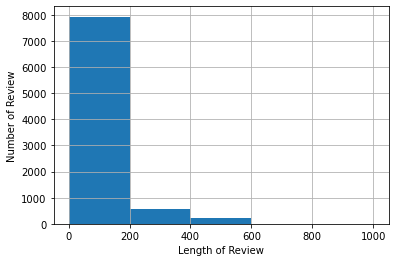

In [28]:
#plotting the average length of reviews
review=df["Review"]
x = [len(review[i]) for i in range(review.shape[0])]

print('average length of review: {:.1f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000]
plt.hist(x, bins=bins)
plt.xlabel('Length of Review')
plt.ylabel('Number of Review')       
plt.grid(True)
plt.show()

#### Observations:
* The average length of review is 77.
* Maximum number of reviews had less than 200 words.
* There were no reviews with more than 600 words.
* Comments with 200 and above words were less.

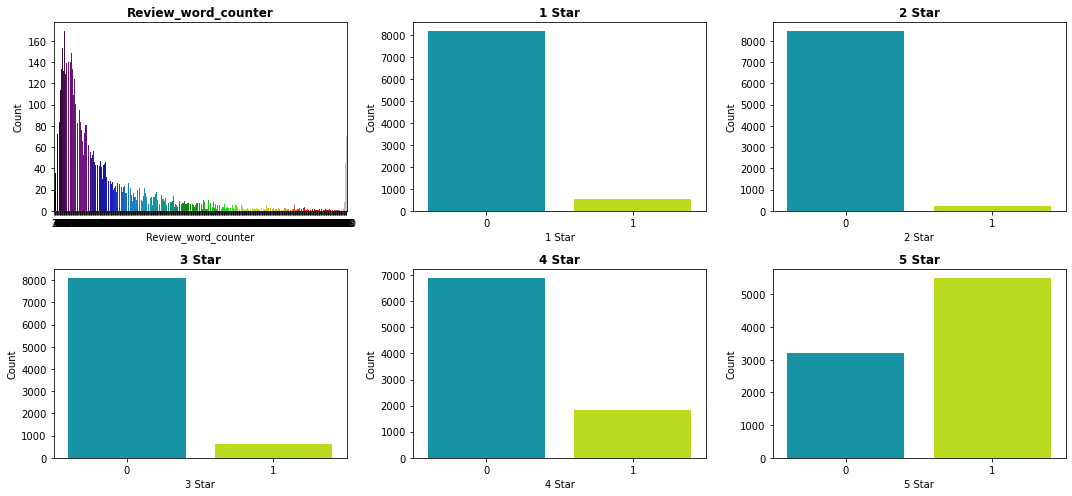

In [29]:
#let us plot countplot of each feature
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
for cols in df.columns:
    if df[cols].dtypes=='int64':
        plt.subplot(a, b, c)
        plt.title('{}'.format(cols),weight='bold')
        sns.countplot(df[cols],palette='nipy_spectral')
        plt.xticks(rotation=360)
        c = c + 1
        plt.tight_layout()
        plt.ylabel("Count")
plt.show()

#### Obseravtions:
   * Around 50% of the review are rated 5 star.
   * 2 star rated reviews are least in number

In [30]:
print(list(df.columns.values))

['Heading', 'Review', 'Product', 'Review_word_counter', '1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


In [31]:
#make a list of columns
categories = list(df.columns.values)
categories = categories[4:]
print(categories)

['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


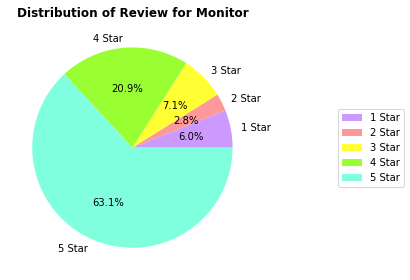

In [32]:
#distribution plot of each type of review
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
df_distribution = df[categories].sum()

df_distribution.plot.pie(y='count',autopct='%1.1f%%',colors=colors)\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.ylabel("")
plt.title("Distribution of Review for Monitor",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* 5 Star rating had the highest share of 63.1%, followed by 4 star with 20.9%.
* 2 Star rating has least share with 2.8%

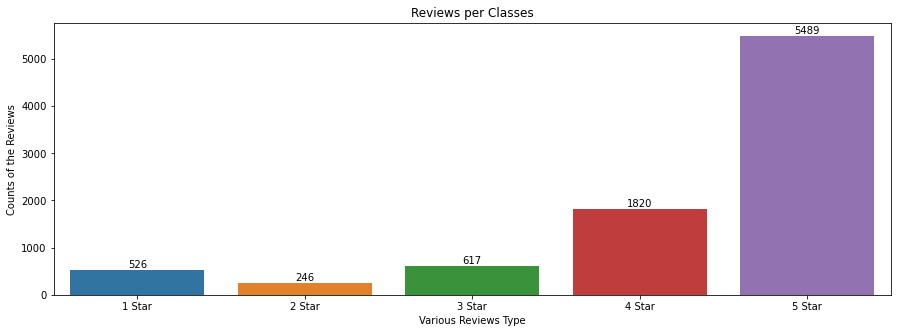

In [33]:
# Checking the count of the various types of reviews
cols = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
val_counts = df[cols].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(val_counts.index, val_counts.values)

plt.title("Reviews per Classes")
plt.xlabel("Various Reviews Type")
plt.ylabel("Counts of the Reviews")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

#### Observations
* There were 5489 5 Star rated reviews which are maximum. 
* 4 Star reviews were second highest with count of 1820
* 2 Star ratings have the least count of only 246.

##  Data Pre-Processing

In [34]:
#convert all text into lowercase 
df['Review'] = df['Review'].str.lower()
df['Heading'] = df['Heading'].str.lower()
#check if the text is lower cased
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,highly recommended,it's amazing,Monitor,12,0,0,0,0,1
1,terrific purchase,nice minitor,Monitor,12,0,0,0,0,1
2,very good,very good ips monitor viewing angles and color...,Monitor,508,0,0,0,1,0
3,good choice,awesome product 👌 worth for money 👌👍,Monitor,36,0,0,0,1,0
4,super!,at 9k 24 inch monitor with such high refresh r...,Monitor,508,0,0,0,0,1


In [35]:
#clean all html tags 
import re
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
#apply the function 
df['Review'] = df['Review'].apply(cleanHtml)
df['Heading'] = df['Heading'].apply(cleanHtml)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,highly recommended,it's amazing,Monitor,12,0,0,0,0,1
1,terrific purchase,nice minitor,Monitor,12,0,0,0,0,1
2,very good,very good ips monitor viewing angles and color...,Monitor,508,0,0,0,1,0
3,good choice,awesome product 👌 worth for money 👌👍,Monitor,36,0,0,0,1,0
4,super!,at 9k 24 inch monitor with such high refresh r...,Monitor,508,0,0,0,0,1


In [36]:
#remove punctuations
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
#call the function
df['Review'] = df['Review'].apply(cleanPunc)
df['Heading'] = df['Heading'].apply(cleanPunc)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,highly recommended,its amazing,Monitor,12,0,0,0,0,1
1,terrific purchase,nice minitor,Monitor,12,0,0,0,0,1
2,very good,very good ips monitor viewing angles and color...,Monitor,508,0,0,0,1,0
3,good choice,awesome product 👌 worth for money 👌👍,Monitor,36,0,0,0,1,0
4,super,at 9k 24 inch monitor with such high refresh r...,Monitor,508,0,0,0,0,1


In [37]:
# any alphabets from small a to small z or capital A to capital Z.
#The plus sign specifies that string should have at least one character.
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
#apply the function
df['Review'] = df['Review'].apply(keepAlpha)
df['Heading'] = df['Heading'].apply(keepAlpha)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,highly recommended,its amazing,Monitor,12,0,0,0,0,1
1,terrific purchase,nice minitor,Monitor,12,0,0,0,0,1
2,very good,very good ips monitor viewing angles and color...,Monitor,508,0,0,0,1,0
3,good choice,awesome product worth for money,Monitor,36,0,0,0,1,0
4,super,at k inch monitor with such high refresh ra...,Monitor,508,0,0,0,0,1


In [38]:
#import libraries for stemming and stopwords removal
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [39]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
df['Review'] = df['Review'].apply(removeStopWords)
df['Heading'] = df['Heading'].apply(removeStopWords)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,highly recommended,amazing,Monitor,12,0,0,0,0,1
1,terrific purchase,nice minitor,Monitor,12,0,0,0,0,1
2,good,good ips monitor viewing angles color reprod...,Monitor,508,0,0,0,1,0
3,good choice,awesome product worth money,Monitor,36,0,0,0,1,0
4,super,k inch monitor high refresh rate clear ...,Monitor,508,0,0,0,0,1


In [40]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['Review'] = df['Review'].apply(stemming)
df['Heading'] = df['Heading'].apply(stemming)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,high recommend,amaz,Monitor,12,0,0,0,0,1
1,terrif purchas,nice minitor,Monitor,12,0,0,0,0,1
2,good,good ip monitor view angl color reproduct grea...,Monitor,508,0,0,0,1,0
3,good choic,awesom product worth money,Monitor,36,0,0,0,1,0
4,super,k inch monitor high refresh rate clear pictur ...,Monitor,508,0,0,0,0,1


In [41]:
import emoji
def emoji_remover(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

df['Review'] = df['Review'].apply(emoji_remover)
df['Heading'] = df['Heading'].apply(emoji_remover)
df.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,high recommend,amaz,Monitor,12,0,0,0,0,1
1,terrif purchas,nice minitor,Monitor,12,0,0,0,0,1
2,good,good ip monitor view angl color reproduct grea...,Monitor,508,0,0,0,1,0
3,good choic,awesom product worth money,Monitor,36,0,0,0,1,0
4,super,k inch monitor high refresh rate clear pictur ...,Monitor,508,0,0,0,0,1


Modelling will be done on heading of reviews as well as on actual review. But there are duplicate values in the heading. Thus we will use only unique heading for model development

# Modelling on Heading of Reviews

In [42]:
df_heading = df.drop_duplicates(subset='Heading')
df_heading.shape

(340, 9)

In [43]:
df_heading = shuffle(df_heading)
df_heading.reset_index(drop=True,inplace=True)

In [44]:
df_heading.head()

,Heading,Review,Product,Review_word_counter,1 Star,2 Star,3 Star,4 Star,5 Star
0,perfect bang buck,bought k deliveri amaz kudo flipkart main reas...,Monitor,508,0,0,0,0,1
1,valu money qualiti,monitor work quit well week sinc far good inch...,Monitor,392,0,0,0,0,1
2,excel monitor beauti display,got product last week good display look larg s...,Monitor,213,0,0,0,0,1
3,goodvalu money,go super game comput,Monitor,36,0,0,0,1,0
4,nice one,receiv good condit well pack nice product valu...,Monitor,108,0,0,0,1,0


In [45]:
# Separation of Labels and Features
x = df_heading['Heading']
y = df_heading[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [46]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
x = tf.fit_transform(x)

In [47]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

### Understanding few concepts before actual model building

### Studying the evaluation metrics

#### 1) Label ranking average precision (LRAP)
It is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score.

This metric is used in multilabel ranking problem, where the goal is to give better rank to the labels associated to each sample.

* The obtained score is always strictly greater than 0 and the best value is 1.

#### 2) Ranking loss measure.

Compute the average number of label pairs that are incorrectly ordered given y_score weighted by the size of the label set and the number of labels not in the label set.

This is similar to the error set size, but weighted by the number of relevant and irrelevant labels.  The best performance is achieved with a ranking loss of zero.

#### 3) Hamming loss
it is important to note that unlikely accuracy in hamming loss the smaller the result is the better is the model. for an example if hamming loss, is 0.32 which means that if you are trying to predict the aspects of 100 sentences the model will predict incorrectly about 32% of the independent aspects.
* hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 4) Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

#### 5) Coverage error
Coverage error measure.

Compute how far we need to go through the ranked scores to cover all true labels. The best value is equal to the average number of labels in y_true per sample.
* The best value of coverage is when it is equal to average number of true class labels.

#### 6) Log loss
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true . The log loss is only defined for two or more labels.
The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model. 

#### 7) Hamming loss
The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 8)  Confusion matrix for multi-label
In multilabel confusion matrix MCM, the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1)  and false positives is(0,1) .



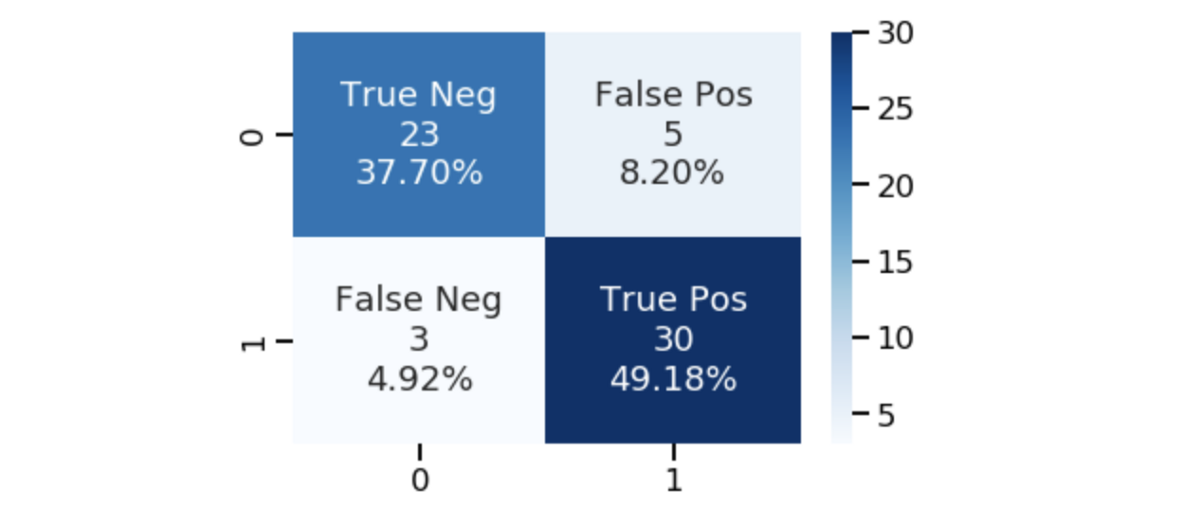

In [48]:
#importing libraries for evaluation
from sklearn.metrics import hamming_loss,accuracy_score,log_loss,f1_score
from sklearn.metrics import coverage_error,precision_score,label_ranking_average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score

# Building model based on Heading of review

### 1) Power Transformation

### 1.1 Binary relevance with GuassianNb as base classifier

In [63]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
#auc_br=roc_auc_score(y_test,predictions.toarray())
#print("AUC ROC score=",auc_br)
#print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  37.64705882352941
Cross validation score= 35.305076851420594


log loss= 14.247977822656795
hamming loss= 0.27058823529411763


f1 score= 0.40414507772020725
average precision score= 0.3611111111111111
label ranking average precision score= 0.5160784313725495
coverage area= 3.3176470588235296




In [50]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[66, 12],
        [ 5,  2]],

       [[71, 14],
        [ 0,  0]],

       [[61, 16],
        [ 4,  4]],

       [[49, 22],
        [ 5,  9]],

       [[24,  5],
        [32, 24]]])

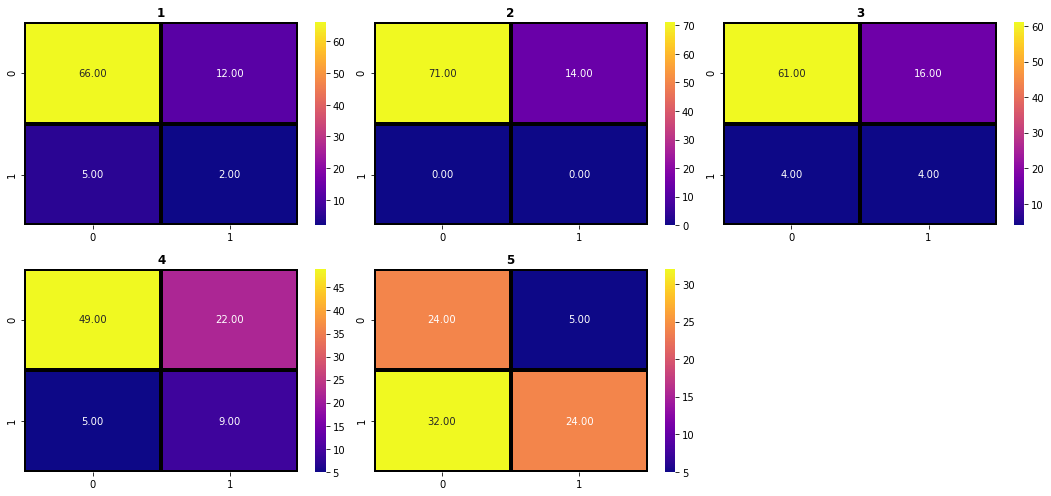

In [51]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 1.2 Label powerset

In [64]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
#auc_lps=roc_auc_score(y_test,predictions.toarray())
#print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  50.588235294117645
Cross validation score= 40.304300574444966


log loss= 17.066218924544106
hamming loss= 0.1976470588235294


f1 score= 0.5058823529411764
average precision score= 0.5058823529411764


coverage area= 2.976470588235294
label ranking average precision score= 0.6047058823529418


In [53]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[76,  2],
        [ 5,  2]],

       [[71, 14],
        [ 0,  0]],

       [[71,  6],
        [ 4,  4]],

       [[58, 13],
        [ 9,  5]],

       [[22,  7],
        [24, 32]]])

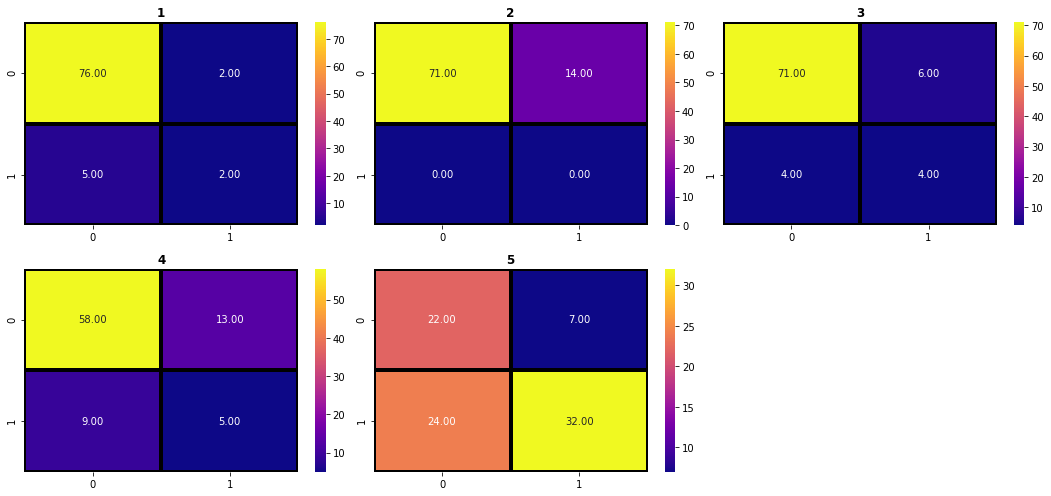

In [54]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [65]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
#auc_cc=roc_auc_score(y_test,predictions.toarray())
#print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  64.70588235294117
Cross validation score= 59.40588935465507


log loss= 10.253136463940447
hamming loss= 0.12941176470588237


f1 score= 0.6666666666666667
average precision score= 0.6875


coverage area= 2.411764705882353
label ranking average precision score= 0.7176470588235299


In [56]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[78,  0],
        [ 7,  0]],

       [[85,  0],
        [ 0,  0]],

       [[77,  0],
        [ 8,  0]],

       [[71,  0],
        [14,  0]],

       [[ 4, 25],
        [ 1, 55]]])

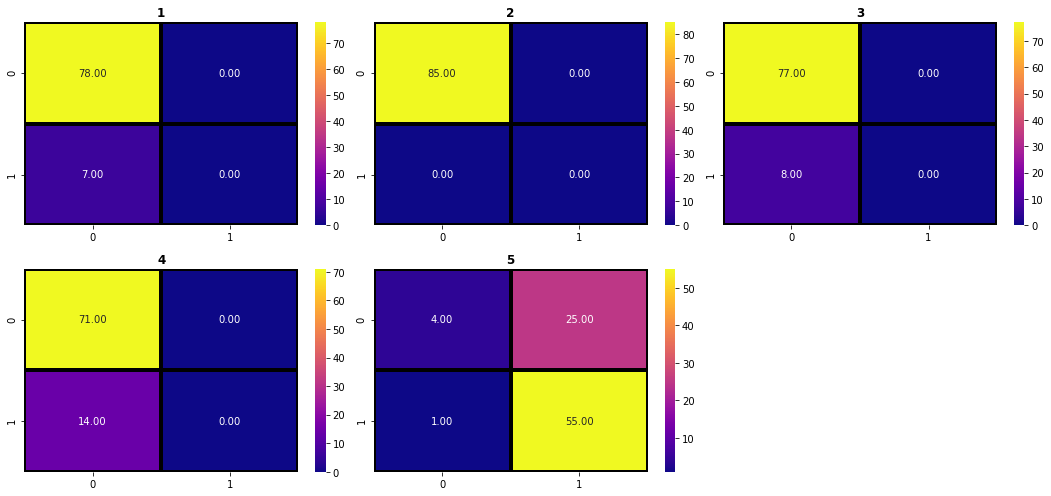

In [57]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 3) Adapted Algorithm
Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN. So, let us quickly implement this on our randomly generated data set.

In [66]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
#auc_mlknn=roc_auc_score(y_test,predictions.toarray())
#print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  56.470588235294116
Cross validation score= 45.590746778450544


log loss= 8.061254516789612
hamming loss= 0.13176470588235295


f1 score= 0.631578947368421
average precision score= 0.7164179104477612


label ranking average precision score= 0.6517647058823535
coverage area= 2.7411764705882353


In [59]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[78,  0],
        [ 7,  0]],

       [[85,  0],
        [ 0,  0]],

       [[72,  5],
        [ 5,  3]],

       [[70,  1],
        [14,  0]],

       [[16, 13],
        [11, 45]]])

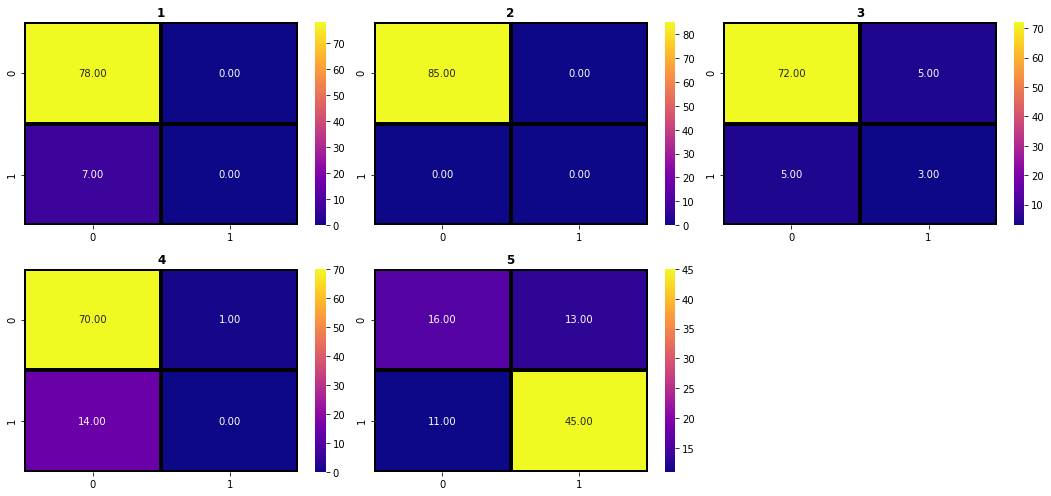

In [60]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### Comparing all the models performance

In [67]:
#creating a comparision table for better understanding

df_comparison_heading=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    #" Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_heading.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,64.705882,59.405889,0.129412,10.253136,0.666667,0.687500,2.411765,0.717647
1,Adapted algorithm,56.470588,45.590747,0.131765,8.061255,0.631579,0.716418,2.741176,0.651765
2,Label powerset,50.588235,40.304301,0.197647,17.066219,0.505882,0.505882,2.976471,0.604706
3,Binary Relevance,37.647059,35.305077,0.270588,14.247978,0.404145,0.361111,3.317647,0.516078


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Adapted Algorithm.
* The accuracy score of Classifier Chain is best out of 4 selected models.

# Building model based on actual reviews and evaluation of its performance

In [68]:
# Separation of Labels and Features
z = df['Review']
y = df[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [69]:
z.shape

(8698,)

In [70]:
y.shape

(8698, 5)

In [71]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
z = tf.fit_transform(z)

In [72]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25, random_state=123)

# 1) Power Transformation
# 1.1 Binary relevance with GuassianNb as base classifier

In [73]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,z,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  10.344827586206897
Cross validation score= 12.25552608311229


log loss= 21.1488233746839
hamming loss= 0.5284597701149425


f1 score= 0.2111187371310913
average precision score= 0.15048923679060666
AUC ROC score= 0.5206824711618954


label ranking average precision score= 0.3187509578544104
coverage area= 4.125057471264368




In [74]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[1004, 1044],
        [  51,   76]],

       [[1496,  618],
        [  37,   24]],

       [[ 765, 1244],
        [  62,  104]],

       [[ 372, 1327],
        [ 107,  369]],

       [[ 722,  108],
        [1149,  196]]])

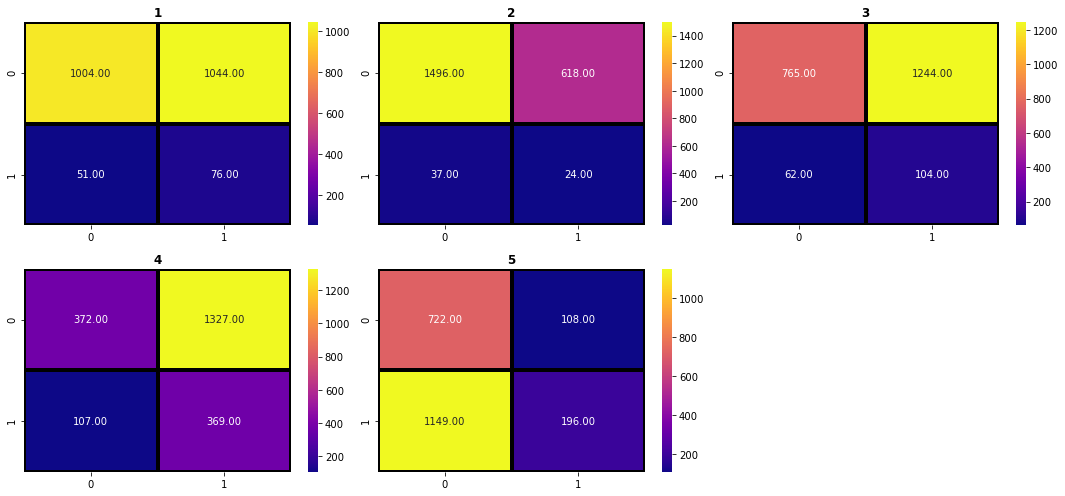

In [75]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 1.2 Label powerset

In [76]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,z,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_lps)

Accuracy =  16.413793103448278
Cross validation score= 18.06148771078414


log loss= 28.869653096987417
hamming loss= 0.33434482758620687


AUC ROC score= 0.5097612662955731
f1 score= 0.16413793103448276
average precision score= 0.16413793103448276


coverage area= 4.343448275862069
label ranking average precision score= 0.3313103448275922


In [77]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[1614,  434],
        [  97,   30]],

       [[1533,  581],
        [  37,   24]],

       [[1625,  384],
        [ 137,   29]],

       [[1407,  292],
        [ 408,   68]],

       [[ 703,  127],
        [1139,  206]]])

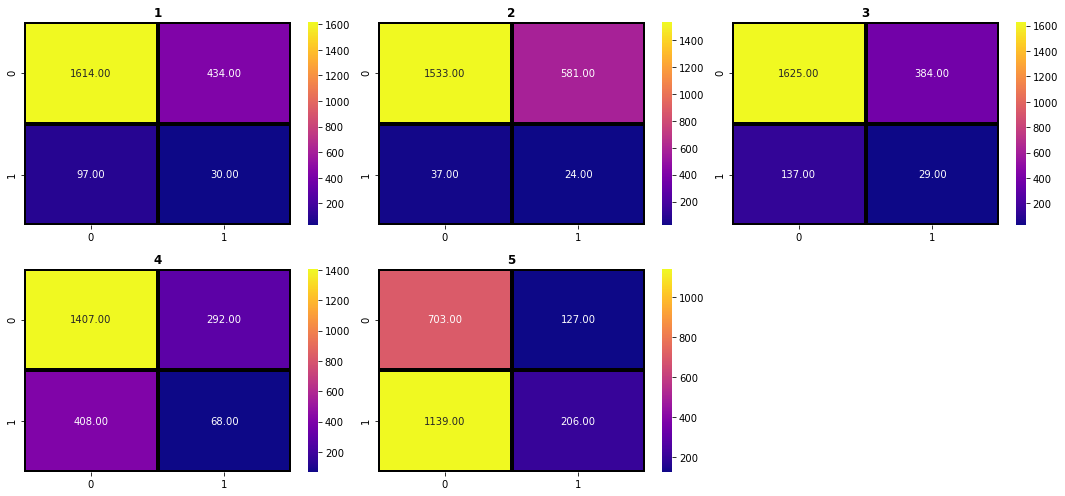

In [78]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [79]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,z,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_cc)

Accuracy =  61.287356321839084
Cross validation score= 62.10616423419887


log loss= 10.206628957092965
hamming loss= 0.135632183908046


AUC ROC score= 0.5237153728781176
f1 score= 0.6438058439990341
average precision score= 0.6780264496439471


coverage area= 2.5485057471264367
label ranking average precision score= 0.690298850574724


In [80]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[2048,    0],
        [ 127,    0]],

       [[2114,    0],
        [  61,    0]],

       [[2008,    1],
        [ 166,    0]],

       [[1697,    2],
        [ 471,    5]],

       [[ 200,  630],
        [  17, 1328]]])

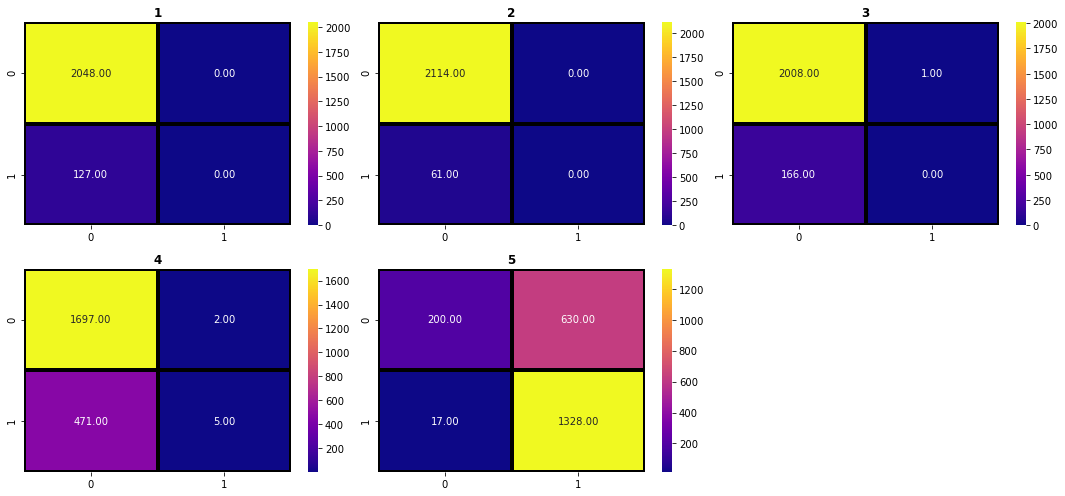

In [81]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 3) Adapted Algorithm

In [82]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,z,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print("label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  55.81609195402299
Cross validation score= 55.71384900857609


log loss= 11.142521401505999
hamming loss= 0.15172413793103448


AUC ROC score= 0.5753336672243237
f1 score= 0.5953898970083374
average precision score= 0.6379400945874935


label ranking average precision score= 0.6465287356321955
coverage area= 2.7673563218390806


In [83]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[2024,   24],
        [  82,   45]],

       [[2111,    3],
        [  59,    2]],

       [[1986,   23],
        [ 156,   10]],

       [[1492,  207],
        [ 393,   83]],

       [[ 398,  432],
        [ 271, 1074]]])

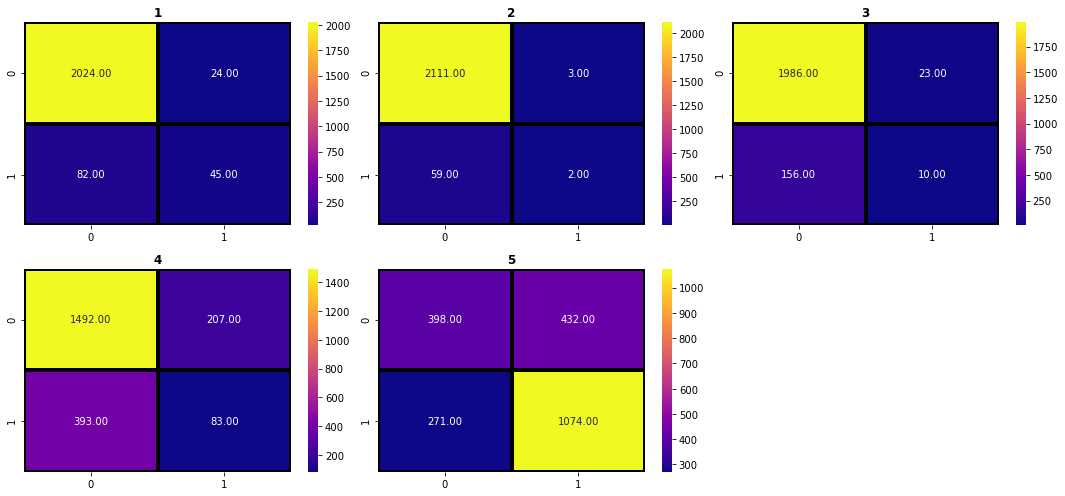

In [84]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

# Comparing all the models performance

In [85]:
#creating a comparision table for better understanding

df_comparison_review=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison_review.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,61.287356,62.106164,0.135632,10.206629,0.523715,0.643806,0.678026,2.548506,0.690299
1,Adapted algorithm,55.816092,55.713849,0.151724,11.142521,0.575334,0.595390,0.637940,2.767356,0.646529
2,Label powerset,16.413793,18.061488,0.334345,28.869653,0.509761,0.164138,0.164138,4.343448,0.331310
3,Binary Relevance,10.344828,12.255526,0.528460,21.148823,0.520682,0.211119,0.150489,4.125057,0.318751


#### Conclusion:
* The hamming loss for Classifier Chain is the least among all.
* The log loss is least for Classifier Chain.
* The AUC ROC Score for Adapted Algorithm is maximum which is 0.57
* The accuracy score of Classifier Chain is best out of 4 selected models.

# Comparison of Model performance for heading and review

In [86]:
df_comparison_heading['Data']='Heading'
df_comparison_review['Data']='Review'
df_merged=pd.concat([df_comparison_heading,df_comparison_review])
df_merged

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,F1 Score,Precision,coverage error,Label ranking,Data,Auc-Roc score
0,Binary Relevance,37.647059,35.305077,0.270588,14.247978,0.404145,0.361111,3.317647,0.516078,Heading,NaN
1,Classifier chain,64.705882,59.405889,0.129412,10.253136,0.666667,0.687500,2.411765,0.717647,Heading,NaN
2,Label powerset,50.588235,40.304301,0.197647,17.066219,0.505882,0.505882,2.976471,0.604706,Heading,NaN
3,Adapted algorithm,56.470588,45.590747,0.131765,8.061255,0.631579,0.716418,2.741176,0.651765,Heading,NaN
0,Binary Relevance,10.344828,12.255526,0.528460,21.148823,0.211119,0.150489,4.125057,0.318751,Review,0.520682
1,Classifier chain,61.287356,62.106164,0.135632,10.206629,0.643806,0.678026,2.548506,0.690299,Review,0.523715
2,Label powerset,16.413793,18.061488,0.334345,28.869653,0.164138,0.164138,4.343448,0.331310,Review,0.509761
3,Adapted algorithm,55.816092,55.713849,0.151724,11.142521,0.595390,0.637940,2.767356,0.646529,Review,0.575334


#### Conclusion:
* The hamming loss by Classifier Chain is the least both for heading of reviews and reviews.
* The log loss is least by Adapted Algorithm for heading of reviews and Classifier Chain for reviews.
* The accuracy score by Classifier Chain is the best both for heading of reviews and reviews.

# Saving Best Model

# saving classifier chain as our best model
import pickle
filename="Review_Classification_Laptop_Model.pkl"
pickle.dump(classifier3,open(filename,'wb'))